<a href="https://colab.research.google.com/github/olusegunajibola/WQU/blob/main/MScFE650_Sub1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Financial Products

### 1.1 What is an Exchange-Traded Fund (ETF)?

ETF is an Exchange-Traded instrument, is basically a type of pooled investment security that tend to follow an index or some sector, commodity.

ETF are financial instrument different than mutual funds which are traded on stock exchanges.

They are also not subject to any of the various rules that mutual-funds are required to follow. ETFs offer lower expense ratio and brokerages compared to stocks.

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.stats as st
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 1.2 Pick 1 of the funds in the data set, and find the weightings.  Show in Python table

In [ ]:
inda_weight = pd.read_html('https://etfdb.com/etf/INDA/#holdings')[4][:-1]
inda_weight.set_index('Symbol', inplace=True)
inda_weight

,Holding,% Assets
Symbol,,
500325,Reliance Industries Limited,9.60%
500209,Infosys Limited,8.49%
500010,Housing Development Finance Corporation Limited,5.63%
532174,ICICI Bank Limited,5.01%
532540,Tata Consultancy Services Limited,4.60%
NaN,MUTUAL FUND (OTHER),2.83%
500034,Bajaj Finance Limited,2.57%
532454,Bharti Airtel Limited,2.42%
500696,Hindustan Unilever Limited,2.34%


### 2. Data importing

### 2.1 Importing data from CSV file

In [ ]:
!ls
import os
os.chdir("/content/drive/MyDrive/Colab Files/WQU_MLiF/GWP_I")

'MScFE 650 MLF GWP Data.csv'   MScFE650_Sub1.ipynb


In [ ]:
data_df = pd.read_csv(r"MScFE 650 MLF GWP Data.csv")
data_df.head()

,Date,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,01-Jan-16,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
1,08-Jan-16,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2,15-Jan-16,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
3,22-Jan-16,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
4,29-Jan-16,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88


## 3. 1-Dimensional Data Summaries

### 3.1 Summarize the min, max, mean, median, and standard deviation of each column

In [ ]:
data_df.describe()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1457.231905,2526.652262,3029.482978,1183.940159,127.418889,91.290238,1813.989167,1970.821627,76.788214,8447.657738,...,2720.597183,1460.507817,595.207738,1618.220755,1348.088135,106.673413,12385.389048,1208.081468,2013.187579,2526.448532
std,238.611226,899.378857,516.678825,101.261295,24.770889,12.106033,354.986912,143.502890,13.192648,978.216958,...,292.192348,284.660584,92.229158,157.305041,93.417184,12.367770,1101.073211,113.761591,181.105639,382.318512
min,871.500000,844.090000,1722.870000,957.150000,78.290000,57.440000,879.170000,1503.010000,48.160000,6671.370000,...,2049.320000,720.230000,344.450000,1263.900000,942.480000,76.340000,9901.400000,1001.930000,1484.410000,1768.520000
25%,1320.741000,1773.735000,2730.897500,1125.265000,102.820000,86.830000,1589.772500,1901.960000,66.552500,7912.862500,...,2509.495000,1224.482500,536.347500,1478.917525,1295.695000,99.715000,11769.345000,1131.110000,1937.375000,2242.712500
50%,1491.081000,2541.975000,3113.414050,1177.375000,130.635000,95.015000,1860.960000,1990.630000,78.710000,8227.805000,...,2795.265000,1555.135000,594.125000,1666.280000,1351.055000,109.280000,12526.645000,1194.815000,2081.695000,2559.080000
75%,1656.015500,3138.222500,3460.390000,1241.797500,146.950000,100.512500,2116.162500,2076.865000,86.532500,8554.552500,...,2985.502500,1692.932500,643.987500,1728.582500,1403.500000,114.397500,12975.560000,1299.405000,2146.630000,2777.425000
max,1812.010000,4467.410000,3750.865500,1431.460000,177.580000,107.340000,2404.740000,2261.280000,103.540000,11852.360000,...,3217.240000,1892.670000,852.930000,1920.630000,1591.700000,128.220000,14989.150000,1484.520000,2255.520000,3386.440000


### 4. Data Visualization

### 4.1 Write a Python function that graphs 1 time series with appropriate time labels

In [ ]:
def func1():
    data_df.plot(x= "Date", y = "LUXXX")
    plt.show()

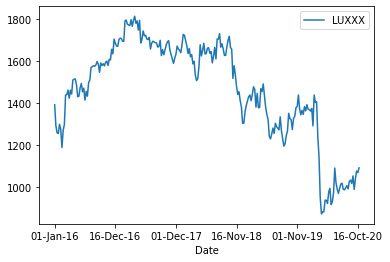

In [ ]:
func1()

### 4.2 Write a Python function that graphs 2 time series on the same plot, with labels

In [ ]:
def func2():
    data_df.plot(x= "Date", y = ["LUXXX", "MSCI INDIA"])
    plt.show()

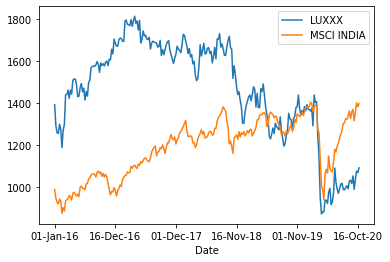

In [ ]:
func2()

### 4.3 Write a Python function that compares the 2 return series

In [ ]:
def func3():
    returns = pd.concat([data_df.LUXXX/ data_df.LUXXX.shift(1), data_df["MSCI INDIA"]/ data_df["MSCI INDIA"].shift(1)], axis=1)
    returns.index = data_df.Date
    returns.plot()
    plt.show()

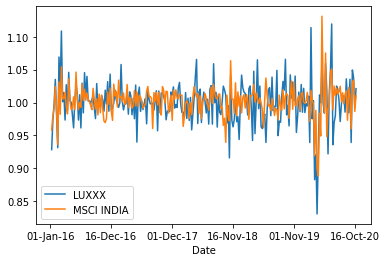

In [ ]:
func3()

## 5. 2-Dimensional Data Summaries

### 5.1 Compute the correlation using Pearson correlation

In [ ]:
data_df.corr(method='pearson')

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.754584,0.823881,0.046895,0.674894,0.850111,0.337350,0.133539,-0.192526,-0.676507,...,0.168444,0.349905,-0.099556,0.556819,0.527276,0.797206,-0.147922,-0.483619,0.754859,-0.462818
MSCI ARGENTINA,0.754584,1.000000,0.740835,-0.160676,0.604493,0.747766,0.260126,-0.047239,-0.000917,-0.474811,...,0.026683,0.242801,-0.225743,0.501144,0.607563,0.661643,-0.209572,-0.459191,0.517648,-0.461817
BLP ORIENTE MEDIO,0.823881,0.740835,1.000000,-0.124534,0.387526,0.925401,0.144240,-0.114781,-0.449813,-0.616805,...,-0.184801,0.002905,-0.265565,0.318689,0.402231,0.646010,-0.340203,-0.549976,0.516283,-0.652986
MSCI AUSTRALIA,0.046895,-0.160676,-0.124534,1.000000,0.516601,-0.027924,0.755042,0.916125,0.536852,0.284185,...,0.810983,0.714497,0.894720,0.648469,0.458925,0.445205,0.775572,0.755159,0.607045,0.715744
MSCI AUSTRIA,0.674894,0.604493,0.387526,0.516601,1.000000,0.495019,0.731040,0.562506,0.438279,-0.300536,...,0.752971,0.825097,0.437568,0.934414,0.725589,0.876846,0.355420,0.122654,0.876490,0.141123
MSCI BELGIUM,0.850111,0.747766,0.925401,-0.027924,0.495019,1.000000,0.209736,-0.036849,-0.369143,-0.616392,...,-0.046238,0.139077,-0.201364,0.444066,0.547095,0.724709,-0.302931,-0.500430,0.627655,-0.602246
MSCI BRAZIL,0.337350,0.260126,0.144240,0.755042,0.731040,0.209736,1.000000,0.732142,0.465766,-0.083163,...,0.768825,0.865784,0.786482,0.810813,0.622795,0.631839,0.511825,0.426602,0.749572,0.408112
MSCI CANADA,0.133539,-0.047239,-0.114781,0.916125,0.562506,-0.036849,0.732142,1.000000,0.676746,0.335889,...,0.820085,0.729537,0.849771,0.624717,0.541088,0.428865,0.857026,0.724269,0.623534,0.759718
MSCI CHINA,-0.192526,-0.000917,-0.449813,0.536852,0.438279,-0.369143,0.465766,0.676746,1.000000,0.602393,...,0.683251,0.578218,0.590822,0.440631,0.417123,0.114691,0.785007,0.705410,0.202909,0.822201
MSCI DENMARK,-0.676507,-0.474811,-0.616805,0.284185,-0.300536,-0.616392,-0.083163,0.335889,0.602393,1.000000,...,0.116178,-0.117812,0.328008,-0.235455,-0.063860,-0.425734,0.654080,0.766011,-0.401304,0.763004


### 5.2 Recompute the calculation, instead of using Spearman correlation


In [ ]:
data_df.corr(method='spearman')

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.760165,0.763908,0.008914,0.630077,0.728380,0.171258,0.014335,-0.116688,-0.538869,...,0.135903,0.284113,-0.189760,0.421563,0.386641,0.696801,-0.108966,-0.443921,0.646838,-0.445698
MSCI ARGENTINA,0.760165,1.000000,0.762681,-0.170967,0.543215,0.815686,0.189584,-0.174087,-0.049772,-0.421900,...,-0.085017,0.211169,-0.274679,0.416496,0.515793,0.611122,-0.263058,-0.502658,0.486479,-0.564665
BLP ORIENTE MEDIO,0.763908,0.762681,1.000000,-0.225116,0.305152,0.881598,0.022868,-0.222396,-0.415513,-0.453115,...,-0.270019,-0.103185,-0.373495,0.187038,0.241724,0.503483,-0.316342,-0.548127,0.382994,-0.668146
MSCI AUSTRALIA,0.008914,-0.170967,-0.225116,1.000000,0.522231,-0.222302,0.702757,0.936633,0.545906,0.408691,...,0.830269,0.706822,0.838601,0.689851,0.494837,0.493137,0.749297,0.714589,0.621821,0.727221
MSCI AUSTRIA,0.630077,0.543215,0.305152,0.522231,1.000000,0.368606,0.674107,0.472486,0.446277,-0.078353,...,0.712182,0.797891,0.403134,0.902973,0.726394,0.878057,0.324909,0.128467,0.846133,0.121610
MSCI BELGIUM,0.728380,0.815686,0.881598,-0.222302,0.368606,1.000000,0.014034,-0.221215,-0.307498,-0.368589,...,-0.235713,-0.050673,-0.410777,0.238371,0.415367,0.527247,-0.300457,-0.530308,0.417859,-0.660276
MSCI BRAZIL,0.171258,0.189584,0.022868,0.702757,0.674107,0.014034,1.000000,0.615794,0.413264,0.104694,...,0.689064,0.809696,0.769487,0.792500,0.567375,0.602130,0.425370,0.425297,0.595758,0.389331
MSCI CANADA,0.014335,-0.174087,-0.222396,0.936633,0.472486,-0.221215,0.615794,1.000000,0.635031,0.471316,...,0.813339,0.649712,0.809950,0.625193,0.486469,0.444318,0.817390,0.739852,0.604094,0.766393
MSCI CHINA,-0.116688,-0.049772,-0.415513,0.545906,0.446277,-0.307498,0.413264,0.635031,1.000000,0.608738,...,0.629511,0.535999,0.589147,0.485453,0.469770,0.282470,0.723844,0.689994,0.323534,0.751277
MSCI DENMARK,-0.538869,-0.421900,-0.453115,0.408691,-0.078353,-0.368589,0.104694,0.471316,0.608738,1.000000,...,0.259644,0.009157,0.416429,0.080001,0.151474,-0.061556,0.676213,0.826300,-0.029171,0.733555


### 5.3 Recompute the calculation, instead of using Kendall correlation

In [ ]:
data_df.corr(method='kendall')

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.558401,0.580861,0.026877,0.457578,0.533989,0.110099,0.052488,-0.058753,-0.365459,...,0.116739,0.192977,-0.093657,0.283916,0.277719,0.513574,-0.039841,-0.256976,0.461898,-0.277493
MSCI ARGENTINA,0.558401,1.000000,0.547910,-0.091383,0.382000,0.601097,0.158351,-0.084424,-0.022009,-0.242965,...,-0.013849,0.188740,-0.153292,0.289924,0.368595,0.408525,-0.144628,-0.281830,0.335863,-0.313350
BLP ORIENTE MEDIO,0.580861,0.547910,1.000000,-0.117454,0.234036,0.704980,0.030232,-0.115679,-0.250095,-0.306242,...,-0.116817,-0.046962,-0.190564,0.158721,0.173331,0.354054,-0.205743,-0.350679,0.263804,-0.425590
MSCI AUSTRALIA,0.026877,-0.091383,-0.117454,1.000000,0.340839,-0.131216,0.522182,0.785012,0.369162,0.297233,...,0.625075,0.497304,0.665802,0.483075,0.331800,0.303170,0.575557,0.566744,0.433455,0.599336
MSCI AUSTRIA,0.457578,0.382000,0.234036,0.340839,1.000000,0.273741,0.485153,0.324764,0.400430,-0.047307,...,0.516966,0.592205,0.284160,0.744375,0.547996,0.704005,0.250830,0.113558,0.677165,0.117130
MSCI BELGIUM,0.533989,0.601097,0.704980,-0.131216,0.273741,1.000000,0.022485,-0.126279,-0.180685,-0.238232,...,-0.104837,-0.023403,-0.244746,0.178684,0.303163,0.415143,-0.189592,-0.321505,0.321089,-0.430069
MSCI BRAZIL,0.110099,0.158351,0.030232,0.522182,0.485153,0.022485,1.000000,0.452413,0.319757,0.097704,...,0.503889,0.641286,0.581737,0.588354,0.390666,0.405806,0.298236,0.326667,0.410042,0.321634
MSCI CANADA,0.052488,-0.084424,-0.115679,0.785012,0.324764,-0.126279,0.452413,1.000000,0.446180,0.324670,...,0.621451,0.466997,0.638462,0.440625,0.331916,0.295318,0.636375,0.559896,0.443875,0.594890
MSCI CHINA,-0.058753,-0.022009,-0.250095,0.369162,0.400430,-0.180685,0.319757,0.446180,1.000000,0.430686,...,0.452568,0.430534,0.424741,0.451658,0.351479,0.249545,0.540665,0.510854,0.281495,0.587971
MSCI DENMARK,-0.365459,-0.242965,-0.306242,0.297233,-0.047307,-0.238232,0.097704,0.324670,0.430686,1.000000,...,0.164675,0.009075,0.282869,0.075414,0.124045,-0.035765,0.492127,0.632686,-0.011257,0.554733


## 6. Data Selection

### 6.1 Choose one of the 35 variables to serve as your response variable (e.g. LUXXX)

In [ ]:
Y = data_df["LUXXX"]

In [ ]:
X = data_df.iloc[:, 2:]

In [ ]:
X.index = data_df.Date

## 7. Principal Component Analysis

### 7.1 Use the Pearson correlation matrix

In [ ]:
sig = X.std()

# Series of standard deviations of each variable
sig

MSCI ARGENTINA             899.378857
BLP ORIENTE MEDIO          516.678825
MSCI AUSTRALIA             101.261295
MSCI AUSTRIA                24.770889
MSCI BELGIUM                12.106033
MSCI BRAZIL                354.986912
MSCI CANADA                143.502890
MSCI CHINA                  13.192648
MSCI DENMARK               978.216958
MSCI EM ASIA                66.154751
MSCI EM EU-MIDE-AFRICA      27.880897
MSCI EM EUROPE              35.676634
MSCI EM LATIN AMERICA      391.780333
MSCI FINLAND                 9.374700
MSCI FRANCE                 14.256886
MSCI GERMANY                11.913640
MSCI HONG KONG            1520.792385
MSCI INDIA                 136.821780
MSCI ITALY                   5.813782
MSCI JAPAN                  87.779355
MSCI KOREA                  72.874560
MSCI MEXICO                725.375215
MSCI NETHERLANDS            16.532705
MSCI NEW ZEALAND            23.014514
MSCI NORWAY                292.192348
MSCI PERU                  284.660584
MSCI RUSSIA 

In [ ]:
#Diagonal matrix of Standard deviations of independent variables
D = np.diag(sig)

#Correlation Matrix
R = X.corr(method='pearson')

S = np.matmul(D, R, D)

In [ ]:
# The covariance matrix = Pearson Correlation Matrix
S

,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
MSCI ARGENTINA,899.378857,666.291663,-144.508990,543.667906,672.524847,233.952263,-42.485507,-0.824484,-427.034847,99.735137,...,23.997977,218.370187,-203.028738,450.718404,546.429324,595.067500,-188.485067,-412.986599,465.561710,-415.348390
BLP ORIENTE MEDIO,382.773945,516.678825,-64.344120,200.226710,478.135055,74.525550,-59.304809,-232.409095,-318.689965,-161.455184,...,-95.483005,1.500802,-137.211776,164.659683,207.824387,333.779490,-175.775505,-284.161212,266.752347,-337.383900
MSCI AUSTRALIA,-16.270304,-12.610482,101.261295,52.311694,-2.827637,76.456556,92.767976,54.362292,28.776915,60.694400,...,82.121193,72.350842,90.600546,65.664788,46.471360,45.082047,78.535461,76.468364,61.470121,72.477211
MSCI AUSTRIA,14.973821,9.599375,12.796668,24.770889,12.262066,18.108501,13.933772,10.856554,-7.444536,13.624793,...,18.651767,20.438385,10.838956,23.146254,17.973485,21.720248,8.804069,3.038237,21.711425,3.495747
MSCI BELGIUM,9.052479,11.202934,-0.338051,5.992719,12.106033,2.539071,-0.446096,-4.468854,-7.462068,-2.784553,...,-0.559757,1.683667,-2.437714,5.375884,6.623146,8.773349,-3.667288,-6.058218,7.598411,-7.290805
MSCI BRAZIL,92.341498,51.203172,268.030116,259.509481,74.453534,354.986912,259.900867,165.340811,-29.521870,199.671634,...,272.922845,307.342027,279.190701,287.828168,221.084107,224.294622,181.691257,151.438041,266.088296,144.874303
MSCI CANADA,-6.778893,-16.471377,131.466546,80.721226,-5.287943,105.064509,143.502890,97.115069,48.201014,106.434212,...,117.684622,104.690702,121.944637,89.648704,77.647655,61.543420,122.985759,103.934652,89.478959,109.021763
MSCI CHINA,-0.012094,-5.934231,7.082494,5.782057,-4.869970,6.144686,8.928077,13.192648,7.947159,12.939105,...,9.013888,7.628222,7.794507,5.813086,5.502963,1.513076,10.356317,9.306228,2.676908,10.847009
MSCI DENMARK,-464.468034,-603.368889,277.994329,-293.989083,-602.965566,-81.351715,328.572121,589.271045,978.216958,525.707104,...,113.647013,-115.245743,320.863238,-230.325782,-62.469240,-416.460286,639.831738,749.324513,-392.562446,746.383013
MSCI EM ASIA,7.336122,-20.672470,39.652099,36.387261,-15.216495,37.210463,49.066112,64.883358,35.552463,66.154751,...,48.305614,43.028052,41.051350,36.204995,35.178956,17.210908,53.860607,45.170092,22.630762,52.236576


### 7.2 Show the amount of variation explained by the first 5 components

In [ ]:
pca = PCA(n_components = 10 )
pca.fit(X)
explained = pca.explained_variance_ratio_
cumulative_explained = explained.cumsum()

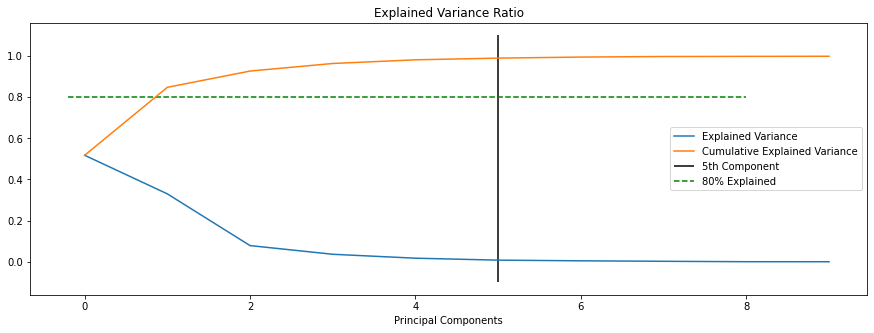

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(0, 10), explained, label='Explained Variance')
plt.plot(range(0, 10), cumulative_explained, label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.vlines(x=5, ymin= -0.1, ymax=1.1, colors= 'k', label = "5th Component")
plt.hlines(y=0.8, xmin=-0.2, xmax=8, colors= 'g', linestyles='--', label = "80% Explained")
plt.title('Explained Variance Ratio')
plt.legend()
plt.show()

In [ ]:
cumulative_explained[4]

0.9811799501538663

*98% of the variance is explained by the first 5 components*

### 7.3 How many components are needed to express 80% of the variation of the data?

It's clear from the above graph that 80% of the variance is explained by the first two components itself.

### 7.4 What is your interpretation of the 1st component?

In [ ]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 10,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [ ]:
weights = pca.components_
weights.shape

(10, 34)

In [ ]:
first_component = weights[0]
vals = np.abs(first_component)

In [ ]:
first_component

array([-0.01310545,  0.0719199 , -0.04456539, -0.00837401,  0.00092208,
       -0.14309244, -0.06730683, -0.00604545, -0.20766975, -0.03174204,
       -0.00886211, -0.01463244, -0.13449574, -0.004237  , -0.00686295,
       -0.00438351, -0.75853678, -0.06721037, -0.00224348, -0.03886247,
       -0.03257971,  0.00189758, -0.00736355, -0.00520343, -0.1358383 ,
       -0.12292317, -0.03942036, -0.05887797, -0.02850608, -0.00280057,
       -0.50169308, -0.04619945, -0.05293849, -0.16236779])

In [ ]:
np.where(vals>0.5)

(array([16, 30]),)

In [ ]:
X.columns[[16, 30]]

Index(['MSCI HONG KONG', 'MSCI SWEDEN'], dtype='object')

*It can be safely interpreted that LUXXX Luxembourg Index is in fact strongly correlated with the MSCI Hong Kong index and the MSCI Sweden Index.*

## 8. We will use PCA and the lasso regression

### 8.1 What do these 2 methodologies have in common?

1. Both methodologies try to avoid the overfitting problem - PCA uses dimensionality reduction by transforming the feature set into principal components whereas Lasso applies the $L_1$ regularization technique to shrink the co-efficients of predictors with less "information" to zero.  

2. Both methods apply linear methodologies.


### 8.2 How do these 2 methodologies differ?

1. $L_1$ regularization technique does not reduce feature space, it penalizes a large number of independent variables, with a lambda $(\lambda)$ factor, PCA reduces the dimensionality in a direct fashion.  

2. LASSO requires some hyper-parameter tuning to select the appropriate Lambda parameter, whereas PCA automatically finds the best transformation of the given number of components that explains the variation

## 9. PCA Regression and Lasso Regression

### 9.1 Run a regression of Y versus the PCA scores

In [ ]:
weights .shape

(10, 34)

In [ ]:
X.shape

(252, 34)

In [ ]:
X_prime = np.matmul(X, weights.T)

In [ ]:
X_prime_top5 = X_prime.iloc[:,:5]

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_prime_top5, Y)

LinearRegression()

In [ ]:
reg.coef_

array([-0.00221467, -0.1369075 , -0.07163975,  0.14879636,  0.04963559])

In [ ]:
print(dir(reg))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_residues', '_set_intercept', '_validate_data', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'normalize', 'positive', 'predict', 'rank_', 'score', 'set_params', 'singular_']


In [ ]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
reg.intercept_

641.1314314728322

In [ ]:
reg.score(X_prime_top5, Y)

0.8947801864331618

In [ ]:
Y_pred = reg.predict(X_prime_top5)
mean_squared_error(Y_pred, Y)

5966.950731547941

In [ ]:
r2_score(Y_pred, Y)

0.8824070814684963

## 10. Lasso Regression

### 10.1 Run a linear regression of Y versus the other predictors

In [ ]:
reg2 = linear_model.LinearRegression()
reg2.fit(X, Y)

LinearRegression()

### 10.2 For the lasso, use at least 1000 different values of the penalty parameter

### 10.3 Split the data into testing and training, with 2/3 for training and 1/3 for testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [ ]:
mse = []
r_list = []

In [ ]:
for r in np.arange(0.1, 10.1, 0.01):
    regL = linear_model.Lasso(alpha = r)
    regL.fit(X_train,y_train)
    y_pred= regL.predict(X_test)
    mismatch = mean_squared_error(y_pred, y_test)
    r_list.append(r)
    mse.append(mismatch)

### 10.4 Graph the overall model mismatch for each of the 1000 values of the paramter

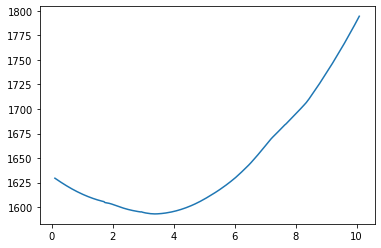

In [ ]:
plt.plot(r_list, mse)
plt.show()

In [ ]:
r_list= []
coeff_count= []

### 10.5 Find a lasso model that includes no more than 7 predictors

In [ ]:
#First we optimize for the best r that captures the highest value with the smallest number of predictors
for r in np.arange(0.1, 10.1, 0.01):
    regL = linear_model.Lasso(alpha = r)
    regL.fit(X_train,y_train)
    coeff = regL.coef_
    count = (np.abs(coeff)>0.1).sum()
    r_list.append(r)
    coeff_count.append(count)

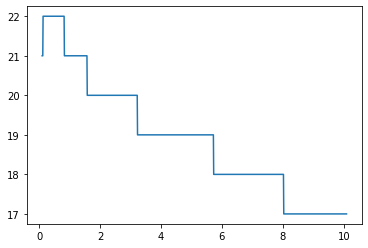

In [ ]:
#Here we plot the number of predictors with "large" co-efficients
plt.plot(r_list, coeff_count)

*We choose r = 8*

In [ ]:
r=8
regL = linear_model.Lasso(alpha = r)
regL.fit(X_train,y_train)
coeff = regL.coef_
count = (np.abs(coeff)>0.1).sum()

In [ ]:
# We now choose the 7 independent variables that have the highest co-efficients
chosen_vars= np.argsort(np.abs(coeff))[-7:]

In [ ]:
#In other words, the chosen independent variables are:
X_train.columns[chosen_vars]

Index(['MSCI SWITZERLAND', 'MSCI AUSTRIA', 'MSCI GERMANY',
       'MSCI EM EU-MIDE-AFRICA', 'MSCI NETHERLANDS', 'MSCI SPAIN',
       'MSCI ITALY'],
      dtype='object')

In [ ]:
X_train_small = X_train.iloc[:, chosen_vars]
X_test_small = X_test.iloc[:, chosen_vars]

In [ ]:
#Now we train the model
regL = linear_model.Lasso(alpha = r)
regL.fit(X_train_small,y_train)
coeff2 = regL.coef_

In [ ]:
regL.score(X_train_small, y_train)

0.9311732722519382

In [ ]:
y_pred= regL.predict(X_test_small)

In [ ]:
r2_score(y_pred, y_test)

0.9304007737471461

In [ ]:
regL.coef_

array([ -0.75227704,   1.11007885,  10.51157951,   0.81370382,
        -2.41678554,   9.95673268, -14.47004985])

In [ ]:
coeff[chosen_vars]

array([-0.92459207,  1.31816244,  1.34162442,  2.30944801, -3.73443648,
        4.26315888, -8.0568325 ])

#### References:

*https://www.investopedia.com/terms/e/etf.asp*